## Clasificadores SVM en Scikit-learn
SVC es la clase principal ofrecida por Scikit-learn, es un algoritmo de clasificación y regresión desarrollado en la  dentro del campo de la ciencia computaciona
### Patrón de modelado de Sckit-Learn

  - Importe el modelo que desea utilizar.
  - Cree una instancia del modelo.
  - Entrenar el modelo sobre los datos y almacenar la información aprendida de los datos.
  - Predecir las etiquetas de nuevos datos.
  
Vamos a mostrar como se utiliza con un ejemplo, para ello vamos a reconocer correctamente los dígitos individuales escritos a mano (0–9) 

In [19]:
import seaborn as sns
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.) #creamos un estimado de tipo SVC
import matplotlib.pyplot as plt
from sklearn import datasets #son conjuntos de datos
digits = datasets.load_digits()

In [20]:
print("hemos cargado "+str(len(digits.images))+" arrays que corresponden a imagenes de dígitos con tamaño 8x8")

hemos cargado 1797 arrays que corresponden a imagenes de dígitos con tamaño 8x8


In [21]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [22]:
digits.target[0]

0

In [23]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

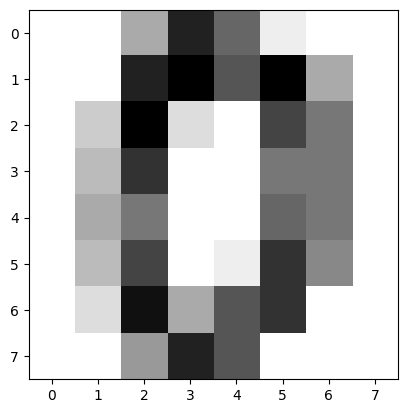

In [24]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [25]:
digits.images[121]

array([[ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16., 10.,  0.,  0.,  0.],
       [ 0.,  6., 16., 13., 11., 12.,  2.,  0.],
       [ 0., 12., 16., 10., 15., 16.,  9.,  0.],
       [ 0.,  4., 14., 16., 16., 12.,  4.,  0.],
       [ 0.,  0.,  0., 14., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 14., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 13.,  0.,  0.,  0.]])

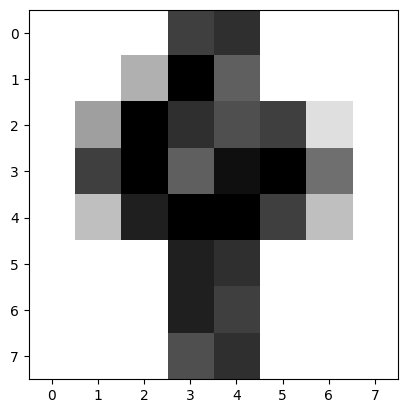

In [26]:
plt.imshow(digits.images[121], cmap=plt.cm.gray_r, interpolation='nearest')

In [27]:
digits.target[121]

4

Ahora vamos a entrenar el estimador svc que hemos definido anteriormente.

In [28]:
svc.fit(digits.data[1:1790],digits.target[1:1790])

SVC(C=100.0, gamma=0.001)

Ahora tenemos que probar nuestro estimador, haciéndolo interpretar los seis dígitos del conjunto de validación.

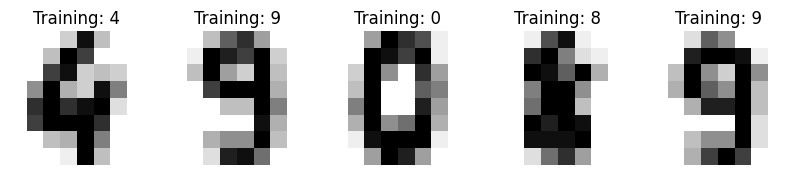

In [29]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
i=1791
for ax in axes:
    image=digits.images[i]
    label=digits.target[i]
    i+=1
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    digits.data[1791:1796]

In [30]:
predicted=svc.predict(digits.data[1791:1796])
predicted

array([4, 9, 0, 8, 9])

In [31]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

In [32]:
from sklearn import metrics

print(
    f"Classification report for classifier {svc}:\n"
    f"{metrics.classification_report(digits.target[1791:1796], predicted)}\n"
)

Classification report for classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5




<AxesSubplot: >

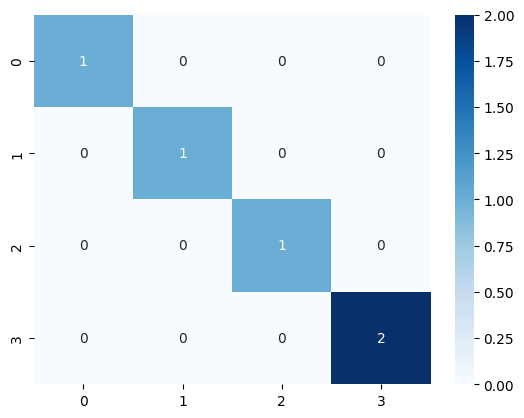

In [33]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(digits.target[1791:1796],predicted)
sns.heatmap(C, annot = True, cmap = 'Blues')

Classification report for classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.99      0.95      0.97        80
           2       0.99      0.99      0.99        77
           3       0.97      0.87      0.92        79
           4       0.99      0.95      0.97        83
           5       0.95      0.99      0.97        82
           6       0.99      0.99      0.99        80
           7       0.96      1.00      0.98        80
           8       0.93      1.00      0.96        76
           9       0.94      0.98      0.96        81

    accuracy                           0.97       797
   macro avg       0.97      0.97      0.97       797
weighted avg       0.97      0.97      0.97       797




<AxesSubplot: >

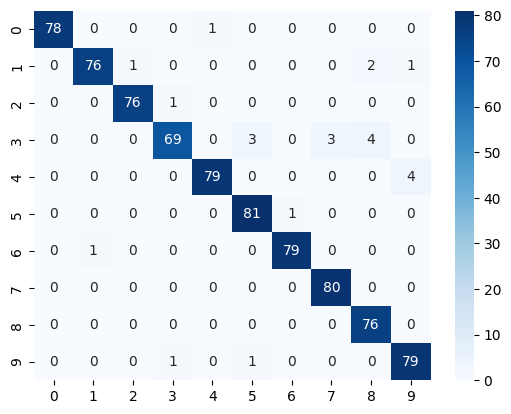

In [34]:
fin=1000
svc.fit(digits.data[0:fin],digits.target[0:fin])
predicted=svc.predict(digits.data[fin:len(digits.data)])
C=confusion_matrix(digits.target[fin:len(digits.data)],predicted)
print(
    f"Classification report for classifier {svc}:\n"
    f"{metrics.classification_report(digits.target[fin:len(digits.data)], predicted)}\n"
)
sns.heatmap(C, annot = True, cmap = 'Blues')

In [35]:
"""Esribe tu código aquí"""

'Esribe tu código aquí'

<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Entrena al modelo utilizando los 500, 200 y 20 primeros dígitos y pruebalo con los 200 siguientes, obten la matriz de confución para cada caso como se muestra a continuación:
<img src="digit.png" ALIGN="left">

## DataSet

Un DataSet representa un conjunto completo de datos, incluyendo las tablas que contienen, ordenan y restringen los datos, así como las relaciones entre las tablas.

Hay muchos <a href="https://datasetsearch.research.google.com/">dataset</a> que podemos utilizar, como ejemplo vamos a usar como ejemplo CIFAR-10, es una colección de imágenes que se usan comúnmente para entrenar algoritmos de aprendizaje automático y visión por computadora. 

In [36]:
import numpy as np
import seaborn as sns
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.) #creamos un estimado de tipo SVC
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn import metrics
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Cargamos "+str(X_train.shape)+" imagenes para entrenar")
print("Cargamos "+str(X_test.shape)+" imagenes para prueba")

In [ ]:
tipo_imagen = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

N=10
f, axarr = plt.subplots(1, N)
f.set_size_inches(16, 6)

for i in range(N):
    axarr[i].imshow(X_train[i])
    axarr[i].title.set_text(tipo_imagen[y_train[i][0]])
plt.show()

In [ ]:
#X_train = np.reshape(X_train,(50000,3072))
#X_test = np.reshape(X_test,(10000,3072))
X_1D_train = []
for i in range(len(X_train)):
    X_1D_train.append(np.ravel(X_train[i]))
X_1D_train = np.array(X_1D_train)

X_1D_test = []
for i in range(len(X_test)):
    X_1D_test.append(np.ravel(X_test[i]))
X_1D_test = np.array(X_1D_test)


X_1D_train = X_1D_train.astype('float32')
X_1D_test = X_1D_test.astype('float32')
# Normalization of pixel values (to [0-1] range)

X_1D_train /= 255
X_1D_test /= 255

# print(len(X_1D_train),len(y_train))
# print(X_1D_train[0])
# print(len(X_train[0][0][0]))

In [ ]:
N_train=5000 #empezaremos utilizando una pequeña parte de las fotos 
X_1D_train_small=X_1D_train[0:N_train]
y_train_small=np.ravel(y_train[0:N_train])
svc.fit(X_1D_train_small,y_train_small)

In [ ]:
#Vamos a probar el modelo con las 10 primeras imagenes
N=10
f, axarr = plt.subplots(1, N)
f.set_size_inches(16, 4)
y_test=np.ravel(y_test)
for i in range(N):
    axarr[i].imshow(X_test[i])
    axarr[i].title.set_text(tipo_imagen[y_test[i]])
plt.show()

In [ ]:
predicted=svc.predict(X_1D_test[0:N])
for i in range(N):
    print(tipo_imagen[y_test[i]],tipo_imagen[predicted[i]])

In [ ]:
#usamos solo las N_test primeras imágenes
N_test=200
predicted=svc.predict(X_1D_test[0:N_test])
y_test=np.ravel(y_test[0:N_test])

print(
    f"Classification report for classifier {svc}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

In [ ]:
C=confusion_matrix(y_test,predicted)
sns.heatmap(C, annot = True, cmap = 'Blues')

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Entrena al modelo utilizando los 100, 1000 y 5000 primeras fotos,  pruebalo con 200 siguientes, obten la matriz de confusión para cada caso como se muestra a continuación:

<img src="conf_imag.png" ALIGN="alignleft size-full">

Ten en cuenta que este ejemplo ha sido hecho con 500,5000 y 50000 fotos